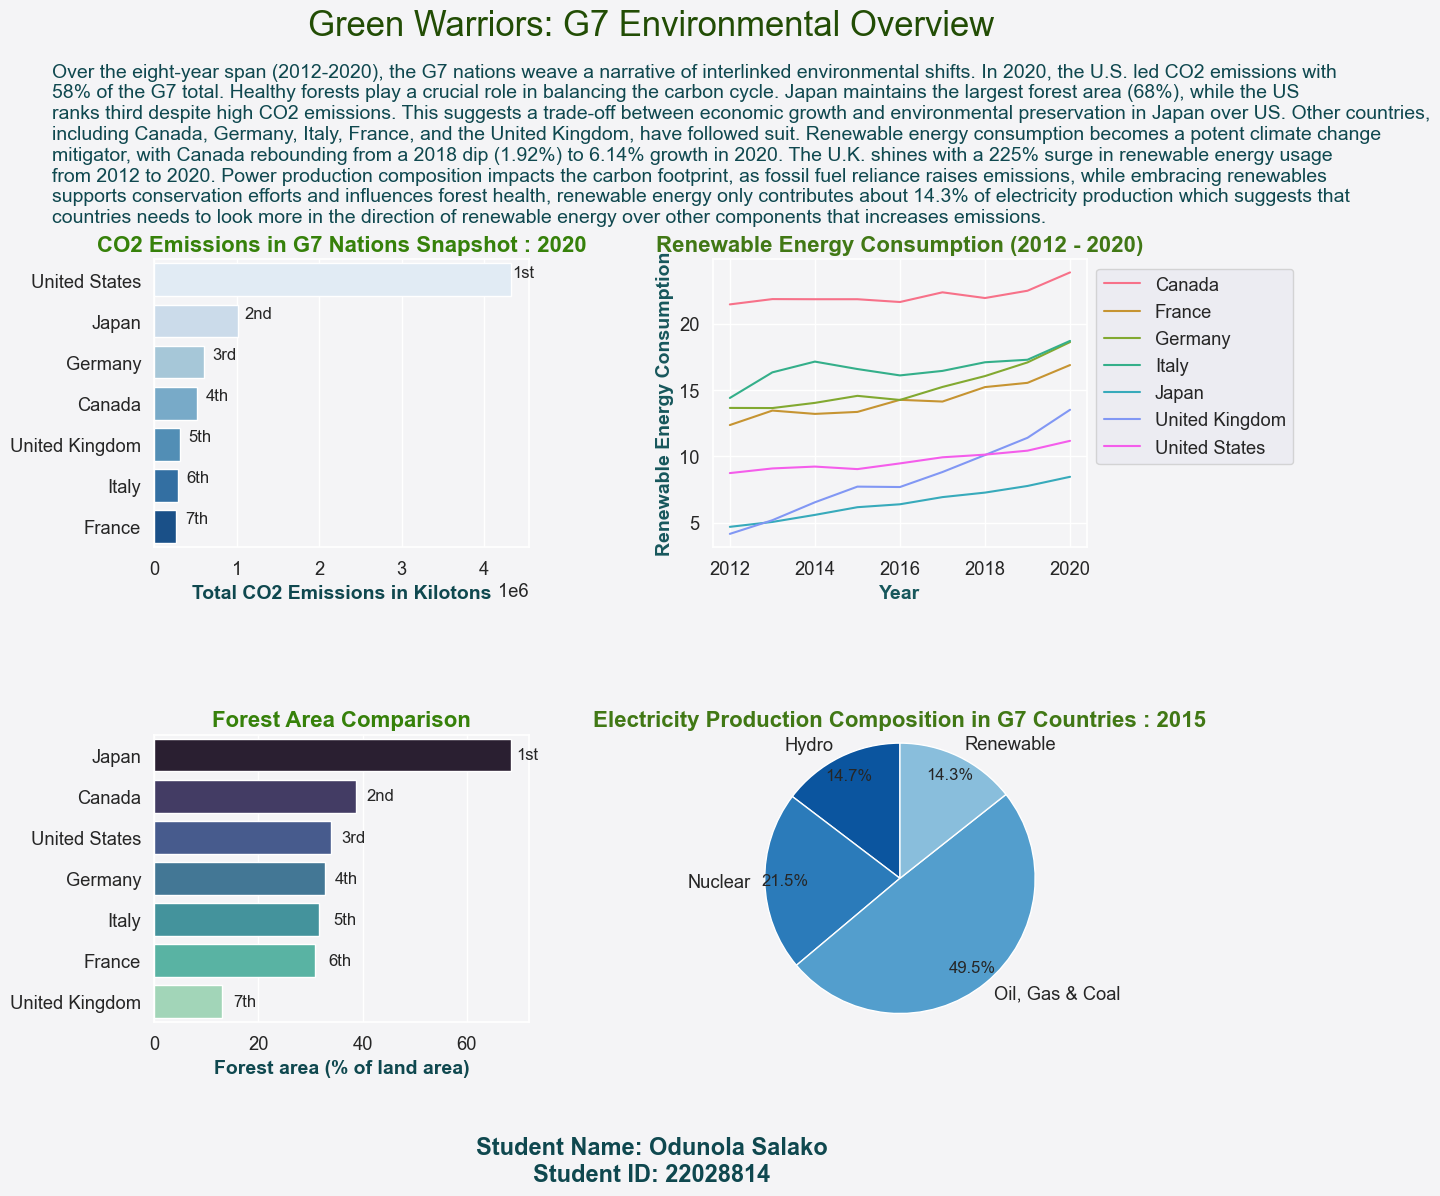

In [4]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the first dataset
df = pd.read_csv('g7_data.csv')

'''

Calculate statistics and calculations to use in infographic explanations

'''
# Calculate the total emissions in year 2020 and find the percentage of each
# Country
total_g7_emissions = df[df['Year'] == 2020]['CO2 emissions (kt)'].sum()
stats_co2 = df[df['Year'] == 2020].copy()
stats_co2.loc[:, 'CO2 %'] = stats_co2.loc[:,
                                          'CO2 emissions (kt)'] / total_g7_emissions * 100

# Japan Forest Area
japan_forest = df[df['Country Name'] == 'Japan']
japan_forest = japan_forest.loc[:, 'Forest area (% of land area)']
japan_forest_mean = japan_forest.mean()
japan_forest_reduction = (
    japan_forest.max() - japan_forest.min()) / japan_forest.max() * 100

# Canada Renewable Energy Growth rate
canada_energy = df[df['Country Name'] == 'Canada']
canada_energy = canada_energy.loc[:,
                                  'Renewable energy consumption (% of total final energy consumption)']
percentage_change = []
for index, value in enumerate(canada_energy):
    if index == 0:
        previous = value
        percentage_change.append(0.0)
    else:
        change = np.round((value - previous) / previous * 100.0, 2)
        percentage_change.append(change)
        previous = value

canada_energy_df = pd.DataFrame(
    {'Renewable energy consumption (% of total final energy consumption)': canada_energy,
     '% Change': percentage_change})

# UK Renewable Energy Growth rate
uk_energy = df[df['Country Name'] == 'United Kingdom']
uk_energy = uk_energy.loc[:,
                          'Renewable energy consumption (% of total final energy consumption)']
percentage_change_uk = []
for index, value in enumerate(uk_energy):
    if index == 0:
        previous = value
        percentage_change_uk.append(0.0)
    else:
        change = np.round((value - previous) / previous * 100.0, 2)
        percentage_change_uk.append(change)
        previous = value

uk_energy_df = pd.DataFrame(
    {'Renewable energy consumption (% of total final energy consumption)': uk_energy,
     '% Change': percentage_change_uk})

'''
Design and Create the Inforgraphic
'''
# Set Aesthetics
sns.set_theme(style='darkgrid', palette='Blues_r', font_scale=1.2)

plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 12

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Define a gradient background color
gradient_color = ['#f4f4f6', '#fcfdfd', '#f2f3f5', '#efeef1']

# Apply the gradient background
fig.patch.set_facecolor(gradient_color[0])
for ax_row in axes:
    for ax in ax_row:
        ax.set_facecolor(gradient_color[0])

# Add a Title for the Entire Infographic
fig.suptitle('Green Warriors: G7 Environmental Overview',
             fontsize=25, color='#224d05')

# Add intro and summary for the infographic
intro_text = """
Over the eight-year span (2012-2020), the G7 nations weave a narrative of\
 interlinked environmental shifts. In 2020, the U.S. led CO2 emissions with 
58% of the G7 total. Healthy forests play a crucial role in balancing the\
 carbon cycle. Japan maintains the largest forest area (68%), while the US 
ranks third despite high CO2 emissions. This suggests a trade-off between\
 economic growth and environmental preservation in Japan over US. Other countries,
including Canada, Germany, Italy, France, and the United Kingdom, have\
 followed suit. Renewable energy consumption becomes a potent climate change
mitigator, with Canada rebounding from a 2018 dip (1.92%) to 6.14% growth in\
 2020. The U.K. shines with a 225% surge in renewable energy usage
from 2012 to 2020. Power production composition impacts the carbon footprint,\
 as fossil fuel reliance raises emissions, while embracing renewables
supports conservation efforts and influences forest health, renewable energy\
 only contributes about 14.3% of electricity production which suggests that
countries needs to look more in the direction of renewable energy over other\
 components that increases emissions. 
"""

fig.text(0.10, 0.785, intro_text, ha='left', va='baseline',
         fontsize=14, color='#0f484f')

# Plot 1: CO2 Emissions Snapshot for 2020
co2_data = df[df['Year'] == 2020].copy()

# Assign ranks based on CO2 emissions (kt)
co2_data.loc[:, 'CO2 Rank'] = co2_data['CO2 emissions (kt)'].rank(
    ascending=False)

ax1 = sns.barplot(x='CO2 emissions (kt)', y='Country Name', data=co2_data,
                  order=co2_data.sort_values('CO2 Rank')['Country Name'],
                  palette='Blues', ax=axes[0, 0])

# Add text labels on each bar
for index, value in enumerate(co2_data['CO2 Rank'].sort_values()):
    if value == 1.0:
        ax1.text(
            co2_data.loc[co2_data['CO2 Rank'] == value,
                         'CO2 emissions (kt)'].values[0] + 150000, index,
            f'{int(value)}st', ha='center', va='bottom')
    elif value == 2.0:
        ax1.text(co2_data.loc[co2_data['CO2 Rank'] == value,
                              'CO2 emissions (kt)'].values[0] + 250000, index,
                 f'{int(value)}nd', ha='center', va='bottom')
    elif value == 3.0:
        ax1.text(co2_data.loc[co2_data['CO2 Rank'] == value,
                              'CO2 emissions (kt)'].values[0] + 250000, index,
                 f'{int(value)}rd', ha='center', va='bottom')
    else:
        ax1.text(co2_data.loc[co2_data['CO2 Rank'] == value,
                              'CO2 emissions (kt)'].values[0] + 250000, index,
                 f'{int(value)}th', ha='center', va='bottom')


axes[0, 0].set_title('CO2 Emissions in G7 Nations Snapshot : 2020',
                     color='#36810a', fontsize=16, fontweight='bold')
axes[0, 0].set_xlabel('Total CO2 Emissions in Kilotons',
                      color='#0f484f', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel(None)

# Plot 2: Forest Area
forest_data = df.loc[:, ['Year', 'Country Name',
                         'Forest area (% of land area)']]

# Assign ranks based on Forest area (% of land area) for each year
forest_data['Forest Rank'] = df.groupby(
    'Year')['Forest area (% of land area)'].rank(ascending=False)

# Create a list of countries arranged according to their rank
forest_order = ['Japan', 'Canada', 'United States', 'Germany',
                'Italy', 'France', 'United Kingdom']

ax2 = sns.barplot(x='Forest area (% of land area)',
                  y='Country Name', data=forest_data, palette='mako',
                  order=forest_order,
                  ax=axes[1, 0], errorbar=None)

# Text annotation for Plot 2
for index, value in enumerate(forest_data[forest_data['Year'] == 2020]['Forest Rank'].sort_values()):
    if value == 1.0:
        ax2.text(forest_data.loc[(forest_data['Year'] == 2020) & (forest_data['Forest Rank'] == value),
                                 'Forest area (% of land area)'].values[0] + 1, index,
                 f'{int(value)}st', va='center')
    elif value == 2.0:
        ax2.text(forest_data.loc[(forest_data['Year'] == 2020) & (forest_data['Forest Rank'] == value),
                                 'Forest area (% of land area)'].values[0] + 2, index,
                 f'{int(value)}nd', va='center')
    elif value == 3.0:
        ax2.text(forest_data.loc[(forest_data['Year'] == 2020) & (forest_data['Forest Rank'] == value),
                                 'Forest area (% of land area)'].values[0] + 2, index,
                 f'{int(value)}rd', va='center')
    else:
        ax2.text(forest_data.loc[(forest_data['Year'] == 2020) & (forest_data['Forest Rank'] == value),
                                 'Forest area (% of land area)'].values[0] + 2, index,
                 f'{int(value)}th', va='center')

axes[1, 0].set_title('Forest Area Comparison', color='#36810a',
                     fontsize=16, fontweight='bold')
axes[1, 0].set_xlabel('Forest area (% of land area)',
                      color='#0f484f', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel(None)


# Plot 3: Renewable Energy Consumption in the G7
renewable_data = df.loc[:, ['Year', 'Country Name',
                            'Renewable energy consumption (% of total final energy consumption)']]

sns.lineplot(x='Year', y='Renewable energy consumption (% of total final energy consumption)',
             data=renewable_data, hue='Country Name', ax=axes[0, 1])

axes[0, 1].set_title('Renewable Energy Consumption (2012 - 2020)',
                     color='#417815', fontsize=16, fontweight='bold')
axes[0, 1].set_xlabel('Year', color='#17575c',
                      fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Renewable Energy Consumption', color='#17575c',
                      fontsize=14, fontweight='bold')
axes[0, 1].legend(loc='upper left', bbox_to_anchor=(1, 1))


# Plot 4: Electricity Production
electricity_data = df.loc[:, ['Year', 'Country Name',
                              'Electricity production from hydroelectric sources (% of total)',
                              'Electricity production from nuclear sources (% of total)',
                              'Electricity production from oil, gas and coal sources (% of total)',
                              'Electricity production from renewable sources, excluding hydroelectric (% of total)']]

electricity_data = electricity_data[electricity_data['Year'] == 2015]

# Melt the data for better plotting
melted_data = pd.melt(electricity_data, id_vars=['Country Name'],
                      value_vars=['Electricity production from hydroelectric sources (% of total)',
                                  'Electricity production from nuclear sources (% of total)',
                                  'Electricity production from oil, gas and coal sources (% of total)',
                                  'Electricity production from renewable sources, excluding hydroelectric (% of total)'])

# Rename the columns for clarity
melted_data = melted_data.rename(
    columns={'variable': 'Electricity Source', 'value': 'Percentage'})

# Concatenate values for all countries
all_countries_data = melted_data.groupby('Electricity Source')[
    'Percentage'].sum().reset_index()

# Plotting on axes [1,1]
axes[1, 1].pie(all_countries_data['Percentage'], labels=['Hydro', 'Nuclear', 'Oil, Gas & Coal', 'Renewable'],
               autopct='%1.1f%%', startangle=90, pctdistance=0.85)
axes[1, 1].set_title('Electricity Production Composition in G7 Countries : 2015',
                     color='#417815', fontsize=16, fontweight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle.
axes[1, 1].axis('equal')

# Add Student Details
student_name = "Odunola Salako"
student_id = "22028814"

student_details = f"Student Name: {student_name}\nStudent ID: {student_id}"
fig.text(0.5, 0.02, student_details, ha='center', va='center',
         fontsize=17, color='#0f484f', fontweight='bold')

# Adjust layout to prevent cutoff in saved image
plt.tight_layout(pad=6.5)

# Show the final infographic
plt.show()